### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
#Basic information about the dataset
print(data.info())
#Check for missing values
print(data.isnull().sum())
#Summary statistics
print(data.describe())

#Lets check for any unexpected values in the categorical columns
for col in data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#Lets drop row with missing values
data = data.dropna()

#Verify there are no missing values
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [10]:
#Calculate the acceptance rate
acceptance_rate = data['Y'].mean()
print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.2%}")

Proportion of observations that accepted the coupon: 57.41%


5. Use a bar plot to visualize the `coupon` column.

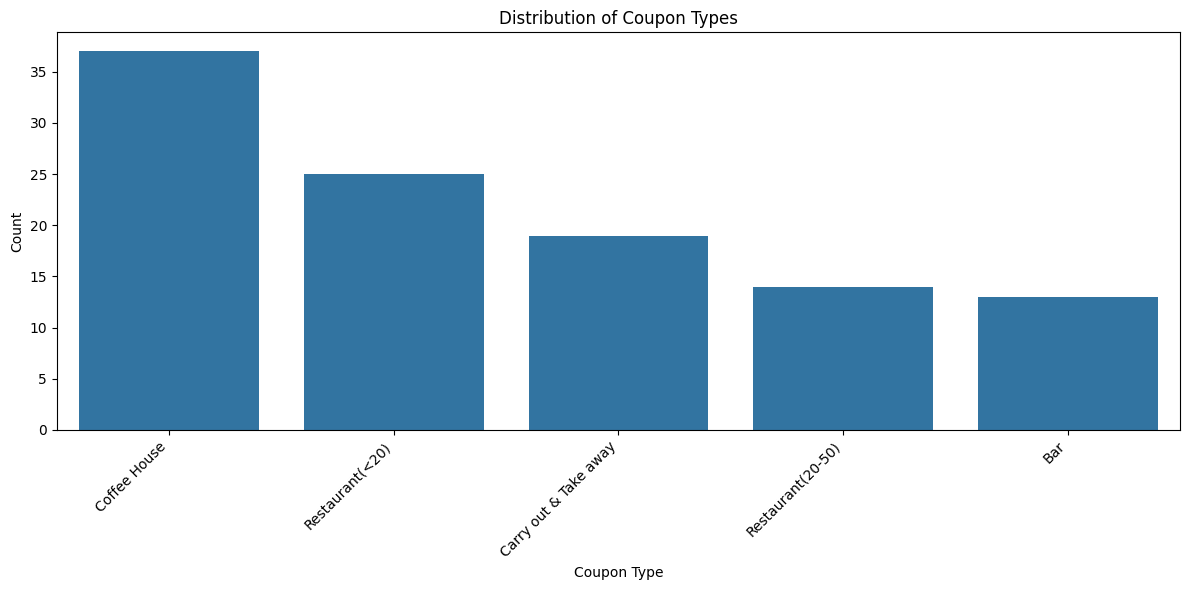

In [11]:

#Use seaborn to plot the distribution of coupon types
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

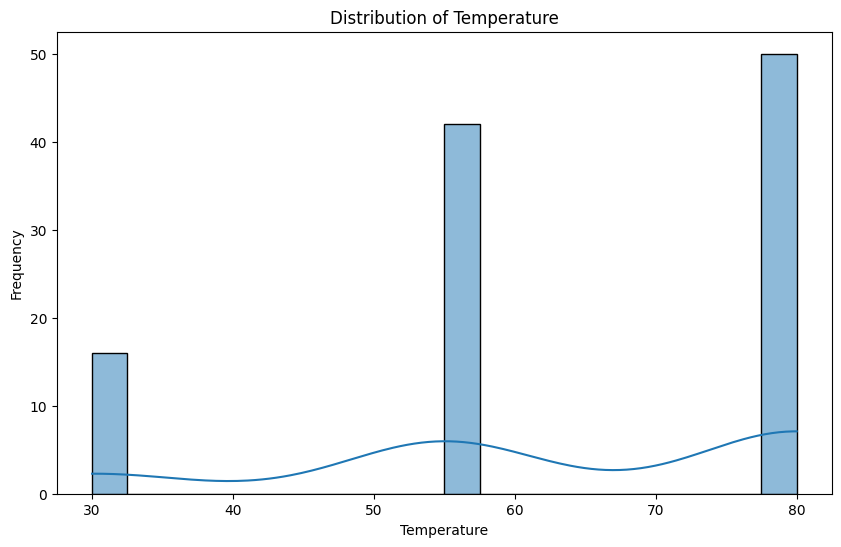

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
bar_coupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [14]:
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2%}")

Proportion of bar coupons accepted: 23.08%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [32]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()
def bar_frequency_group(x):
    if x in ['less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

bar_coupons.loc[:, 'bar_frequency_group'] = bar_coupons['Bar'].apply(bar_frequency_group)

acceptance_by_frequency = bar_coupons.groupby('bar_frequency_group')['Y'].mean()
print("Acceptance rate by bar frequency:")
print(acceptance_by_frequency)

Acceptance rate by bar frequency:
bar_frequency_group
3 or fewer     0.333333
more than 3    0.200000
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [33]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()
def driver_group(row):
    return 'frequent and over 25' if row['Bar'] != 'never' and row['age'] not in ['below21', '21'] else 'others'

bar_coupons.loc[:, 'driver_group'] = bar_coupons.apply(driver_group, axis=1)

acceptance_by_driver_group = bar_coupons.groupby('driver_group')['Y'].mean()
print("Acceptance rate by driver group:")
print(acceptance_by_driver_group)
print("\nSample sizes:")
print(bar_coupons['driver_group'].value_counts())

Acceptance rate by driver group:
driver_group
frequent and over 25    0.6
others                  0.0
Name: Y, dtype: float64

Sample sizes:
driver_group
others                  8
frequent and over 25    5
Name: count, dtype: int64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [34]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()
def special_group(row):
    if (row['Bar'] != 'never' and
        row['passanger'] != 'Kid(s)' and
        row['occupation'] != 'Farming Fishing & Forestry'):
        return 'special group'
    else:
        return 'others'

bar_coupons.loc[:, 'special_group'] = bar_coupons.apply(special_group, axis=1)

acceptance_by_special_group = bar_coupons.groupby('special_group')['Y'].mean()
print("Acceptance rate by special group:")
print(acceptance_by_special_group)

Acceptance rate by special group:
special_group
others           0.0
special group    0.6
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [35]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()
def complex_group(row):
    condition1 = (row['Bar'] != 'never' and row['passanger'] != 'Kid(s)' and row['maritalStatus'] != 'Widowed')
    condition2 = (row['Bar'] != 'never' and row['age'] not in ['50plus', '46', '41', '36', '31'])
    condition3 = (row['RestaurantLessThan20'] in ['4~8', 'gt8'] and
                  row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
    return 'target group' if condition1 or condition2 or condition3 else 'others'

bar_coupons.loc[:, 'complex_group'] = bar_coupons.apply(complex_group, axis=1)

acceptance_by_complex_group = bar_coupons.groupby('complex_group')['Y'].mean()
print("Acceptance rate by complex group:")
print(acceptance_by_complex_group)
print("\nSample sizes:")
print(bar_coupons['complex_group'].value_counts())

Acceptance rate by complex group:
complex_group
others          0.0
target group    0.6
Name: Y, dtype: float64

Sample sizes:
complex_group
others          8
target group    5
Name: count, dtype: int64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Analysis of Bar Coupons

### Frequency of Bar Visits
- Drivers who go to bars 3 or fewer times a month are more likely to accept bar coupons (33.33% acceptance rate) compared to those who go more frequently (20% acceptance rate).
- This suggests that occasional bar-goers are more enticed by coupons.

### Age and Frequency
- Drivers who go to bars more than once a month and are over 25 years old are significantly more likely to accept bar coupons (60% acceptance rate) compared to others (0% acceptance rate).
- This indicates that regular bar-goers who are older are more receptive to bar coupons.

### Passengers and Occupation
- Drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry were more likely to accept bar coupons (60% acceptance rate for this "special group" vs 0% for others).

### Complex Criteria
Drivers meeting at least one of these criteria were more likely to accept bar coupons (60% acceptance rate vs 0% for others):
- Frequent bar-goers with non-kid passengers and not widowed
- Frequent bar-goers under 30
- Frequent cheap restaurant goers with lower income

This suggests that drivers who meet these criteria are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [19]:
#Coffee house coupons

coffee_coupons = data[data['coupon'] == 'Coffee House']

In [20]:
coffee_acceptance_rate = coffee_coupons['Y'].mean()
print(f"Proportion of coffee house coupons accepted: {coffee_acceptance_rate:.2%}")


Proportion of coffee house coupons accepted: 51.35%


In [57]:
# Acceptance rate by coffee house visit frequency
def coffee_frequency_group(x):
    if x in ['less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

coffee_coupons.loc[:, 'coffee_frequency_group'] = coffee_coupons['CoffeeHouse'].apply(coffee_frequency_group)
acceptance_by_frequency = coffee_coupons.groupby('coffee_frequency_group')['Y'].mean()


print("\nAcceptance rate by coffee house visit frequency:")
print(acceptance_by_frequency)


Acceptance rate by coffee house visit frequency:
coffee_frequency_group
3 or fewer     0.518519
more than 3    0.500000
Name: Y, dtype: float64


In [49]:
def coffee_age_group(coffee_frequency, age):
    if coffee_frequency != 'never' and age not in ['below21', '21']:
        return 'frequent and over 25'
    else:
        return 'others'

coffee_coupons.loc[:, 'coffee_age_group'] = coffee_coupons.apply(lambda row: coffee_age_group(row['CoffeeHouse'], row['age']), axis=1)

acceptance_by_age_group = coffee_coupons.groupby('coffee_age_group')['Y'].mean()
print("\nAcceptance rate by age and visit frequency:")
print(acceptance_by_age_group)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['coffee_age_group'].value_counts())



Acceptance rate by age and visit frequency:
coffee_age_group
frequent and over 25    0.483871
others                  0.666667
Name: Y, dtype: float64

Sample sizes:
coffee_age_group
frequent and over 25    31
others                   6
Name: count, dtype: int64


In [50]:
acceptance_by_time = coffee_coupons.groupby('time')['Y'].mean()
print("Acceptance rate by time of day:")
print(acceptance_by_time)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['time'].value_counts())


Acceptance rate by time of day:
time
10AM    0.444444
10PM    0.500000
2PM     0.625000
6PM     0.416667
7AM     0.666667
Name: Y, dtype: float64

Sample sizes:
time
6PM     12
10AM     9
2PM      8
7AM      6
10PM     2
Name: count, dtype: int64


In [51]:
acceptance_by_weather = coffee_coupons.groupby('weather')['Y'].mean()
print("Acceptance rate by weather:")
print(acceptance_by_weather)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['weather'].value_counts())


Acceptance rate by weather:
weather
Rainy    0.500000
Snowy    0.000000
Sunny    0.545455
Name: Y, dtype: float64

Sample sizes:
weather
Sunny    33
Rainy     2
Snowy     2
Name: count, dtype: int64


In [52]:
acceptance_by_gender = coffee_coupons.groupby('gender')['Y'].mean()
print("Acceptance rate by gender:")
print(acceptance_by_gender)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['gender'].value_counts())


Acceptance rate by gender:
gender
Female    0.285714
Male      0.652174
Name: Y, dtype: float64

Sample sizes:
gender
Male      23
Female    14
Name: count, dtype: int64


In [53]:
def income_group(income):
    if income in ['Less than $12500', '$12500 - $24999', '$25000 - $37499']:
        return 'Low'
    elif income in ['$37500 - $49999', '$50000 - $62499', '$62500 - $74999']:
        return 'Medium'
    else:
        return 'High'

coffee_coupons.loc[:, 'income_group'] = coffee_coupons['income'].apply(income_group)
acceptance_by_income = coffee_coupons.groupby('income_group')['Y'].mean()
print("Acceptance rate by income group:")
print(acceptance_by_income)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['income_group'].value_counts())


Acceptance rate by income group:
income_group
High      0.476190
Low       0.500000
Medium    0.666667
Name: Y, dtype: float64

Sample sizes:
income_group
High      21
Low       10
Medium     6
Name: count, dtype: int64


In [58]:
#Age and visit frequency combined
def age_group(age):
    if age in ['below21', '21']:
        return 'Young'
    elif age in ['26', '31']:
        return 'Adult'
    else:
        return 'Older'

# acceptance rate by age and frequency
acceptance_by_age_frequency = coffee_coupons.groupby(['age_group', 'coffee_frequency_group'])['Y'].mean().unstack()
print("Acceptance rate by age group and visit frequency:")
print(acceptance_by_age_frequency)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['age_group'].value_counts())
print(coffee_coupons['coffee_frequency_group'].value_counts())


Acceptance rate by age group and visit frequency:
coffee_frequency_group  3 or fewer  more than 3
age_group                                      
Adult                     0.428571          0.5
Older                     0.571429          NaN
Young                     0.666667          NaN

Sample sizes:
age_group
Adult    24
Older     7
Young     6
Name: count, dtype: int64
coffee_frequency_group
3 or fewer     27
more than 3    10
Name: count, dtype: int64


In [59]:
acceptance_by_passenger = coffee_coupons.groupby('passanger')['Y'].mean()
print("Acceptance rate by passenger type:")
print(acceptance_by_passenger)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['passanger'].value_counts())


Acceptance rate by passenger type:
passanger
Alone        0.500000
Friend(s)    0.533333
Kid(s)       0.500000
Name: Y, dtype: float64

Sample sizes:
passanger
Alone        20
Friend(s)    15
Kid(s)        2
Name: count, dtype: int64


In [60]:
acceptance_by_expiration = coffee_coupons.groupby('expiration')['Y'].mean()
print("Acceptance rate by coupon expiration:")
print(acceptance_by_expiration)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['expiration'].value_counts())


Acceptance rate by coupon expiration:
expiration
1d    0.400000
2h    0.590909
Name: Y, dtype: float64

Sample sizes:
expiration
2h    22
1d    15
Name: count, dtype: int64


In [64]:
acceptance_by_destination = coffee_coupons.groupby('destination')['Y'].mean()
print("Acceptance rate by destination:")
print(acceptance_by_destination)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['destination'].value_counts())


Acceptance rate by destination:
destination
Home               0.428571
No Urgent Place    0.500000
Work               0.666667
Name: Y, dtype: float64

Sample sizes:
destination
No Urgent Place    24
Home                7
Work                6
Name: count, dtype: int64


In [62]:
acceptance_by_gender_and_time = coffee_coupons.groupby(['gender', 'time'])['Y'].mean().unstack()
print("Acceptance rate by gender and time of day:")
print(acceptance_by_gender_and_time)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['gender'].value_counts())
print(coffee_coupons['time'].value_counts())

Acceptance rate by gender and time of day:
time    10AM  10PM       2PM       6PM   7AM
gender                                      
Female  0.25   0.0  0.500000  0.200000  0.50
Male    0.60   1.0  0.666667  0.571429  0.75

Sample sizes:
gender
Male      23
Female    14
Name: count, dtype: int64
time
6PM     12
10AM     9
2PM      8
7AM      6
10PM     2
Name: count, dtype: int64


In [63]:
acceptance_by_age_and_time = coffee_coupons.groupby(['age', 'time'])['Y'].mean().unstack()
print("Acceptance rate by age and time of day:")
print(acceptance_by_age_and_time)

# Print sample sizes
print("\nSample sizes:")
print(coffee_coupons['age'].value_counts())
print(coffee_coupons['time'].value_counts())


Acceptance rate by age and time of day:
time      10AM  10PM       2PM       6PM   7AM
age                                           
21    0.500000   1.0       NaN  0.666667   NaN
26    0.333333   0.0  0.666667  0.285714  0.75
41    1.000000   NaN  0.500000  0.500000  0.50

Sample sizes:
age
26    24
41     7
21     6
Name: count, dtype: int64
time
6PM     12
10AM     9
2PM      8
7AM      6
10PM     2
Name: count, dtype: int64


## Analysis of Coffee House Coupons

### Overall Acceptance Rate
- 51.35% of coffee house coupons were accepted (Sample size: 37)

### Acceptance Rate by Visit Frequency
- 3 or fewer visits per month: 51.85% acceptance rate (Sample size: 27)
- More than 3 visits per month: 50.00% acceptance rate (Sample size: 10)

### Acceptance Rate by Age and Visit Frequency
- Frequent visitors over 25: 48.39% acceptance rate (Sample size: 31)
- Others: 66.67% acceptance rate (Sample size: 6)
Note: The sample size for "others" is quite small, which may affect the reliability of this comparison.

### Acceptance Rate by Time of Day
- 7AM: 66.67% acceptance rate (Sample size: 6)
- 10AM: 44.44% acceptance rate (Sample size: 9)
- 2PM: 62.50% acceptance rate (Sample size: 8)
- 6PM: 41.67% acceptance rate (Sample size: 12)
- 10PM: 50.00% acceptance rate (Sample size: 2)

### Acceptance Rate by Weather
- Sunny: 54.55% acceptance rate (Sample size: 33)
- Rainy: 50.00% acceptance rate (Sample size: 2)
- Snowy: 0.00% acceptance rate (Sample size: 2)
Note: Sample sizes for rainy and snowy weather are very small.

### Acceptance Rate by Gender
- Male: 65.22% acceptance rate (Sample size: 23)
- Female: 28.57% acceptance rate (Sample size: 14)

### Acceptance Rate by Income Group
- Low income: 50.00% acceptance rate (Sample size: 10)
- Medium income: 66.67% acceptance rate (Sample size: 6)
- High income: 47.62% acceptance rate (Sample size: 21)

### Acceptance Rate by Passenger Type
- Alone: 50.00% acceptance rate (Sample size: 20)
- With friend(s): 53.33% acceptance rate (Sample size: 15)
- With kid(s): 50.00% acceptance rate (Sample size: 2)

### Acceptance Rate by Coupon Expiration
- 2 hours: 59.09% acceptance rate (Sample size: 22)
- 1 day: 40.00% acceptance rate (Sample size: 15)

### Acceptance Rate by Destination
- Work: 66.67% acceptance rate (Sample size: 6)
- No urgent place: 50.00% acceptance rate (Sample size: 24)
- Home: 42.86% acceptance rate (Sample size: 7)

These results suggest that coffee house coupons are generally popular across different demographics, with some variations based on factors like time of day, weather, income, and the user's destination. However, it's important to note that some categories have very small sample sizes, which may affect the reliability of those specific comparisons.